In [10]:
#Gerekli kütüphaneleri import ettim
import pandas as pd 
import numpy as np 
import matplotlib as plt
import seaborn as sbn
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

In [11]:
data=pd.read_csv("car_data.csv")#Data'yı hazırladım
data.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [12]:
print(data.shape)#Data boyutu
print(data.columns)#Data'da bulunan sütun isimleri

(1000, 5)
Index(['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')


In [13]:
data.drop("User ID",axis=1,inplace=True)#User Id seçeneğini data dan kaldırdım
data.head()

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0


In [14]:
#Label Encoder; 
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
data["Gender"]=le.fit_transform(data["Gender"])
data.head()

,Gender,Age,AnnualSalary,Purchased
0,1,35,20000,0
1,1,40,43500,0
2,1,49,74000,0
3,1,40,107500,1
4,1,25,79000,0


In [15]:
data.isnull().sum()#Data'da boş değer olup olmadığına baktım

Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [16]:
data.describe()

,Gender,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.484000,40.106000,72689.000000,0.402000
std,0.499994,10.707073,34488.341867,0.490547
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,32.000000,46375.000000,0.000000
50%,0.000000,40.000000,72000.000000,0.000000
75%,1.000000,48.000000,90000.000000,1.000000
max,1.000000,63.000000,152500.000000,1.000000


In [ ]:
x=data.drop("Purchased",axis=1)#Bağımsız değişken
y=data[["Purchased"]]#Bağımlı değişken

import statsmodels.api as sm
model=sm.OLS(y,x).fit()
model.summary()

In [18]:
#Data'yı eğitim ve test kümelerine ayırdım
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

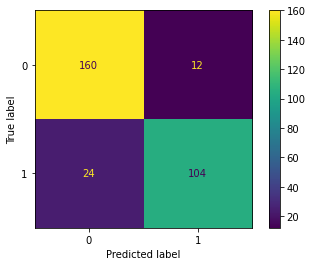

In [19]:
#Bagging Meta Estimator
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
bc=BaggingClassifier(tree.DecisionTreeClassifier(random_state=42))
bc.fit(x_train,y_train.values.ravel())
tablo=ConfusionMatrixDisplay(confusion_matrix(y_test,bc.predict(x_test)))
tablo.plot()

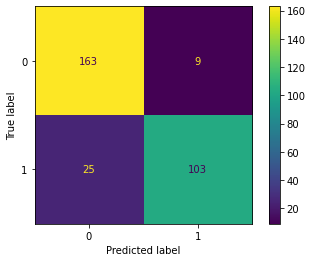

In [20]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ac=AdaBoostClassifier(random_state=42)
ac.fit(x_train,y_train.values.ravel())
tablo=ConfusionMatrixDisplay(confusion_matrix(y_test,ac.predict(x_test)))
tablo.plot()

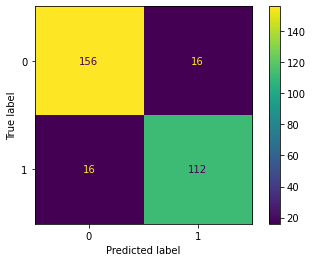

In [21]:
#Gradient Boosting(GBM)
from sklearn.ensemble import GradientBoostingClassifier
gc=GradientBoostingClassifier(learning_rate=0.01,random_state=42).fit(x_train,y_train.values.ravel())
tablo=ConfusionMatrixDisplay(confusion_matrix(y_test,gc.predict(x_test)))
tablo.plot()